### Import tensorflow and disable v2

In [1]:
#Importing packages
import time
import tensorflow.compat.v1 as tf
import input_data

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Load MNIST Data

In [2]:
#MNIST Dataset has 70000 instances of hand written digits from 0-9, each image size is 28*28
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


### Define the Hyperparameter & Data info

In [3]:
#Learning Rate, Iterations, Batch Size Hyperparameters
learning_rate = 0.001
iterations = 10000
batch_size = 128
#dropout = 0.5
#epochs = 10

### Create placeholders for Input(X) and Output(Y)

In [4]:
#Define the placeholders for holding Input and Output Instances
#Here shape is [None, 784], where None means any number of  examples can be passed and 784 stands for 28 * 28
X = tf.placeholder(tf.float32, shape = [None, 784])
#Here shape is [None, 10], where 10 represents number of output classes
Y = tf.placeholder(tf.float32, shape = [None, 10])

### Define the weight matrices

In [5]:
#Defining the weights of 2 hidden layers and output layer
w1 = tf.Variable(tf.truncated_normal([784, 512], stddev = 0.1))
w2 = tf.Variable(tf.truncated_normal([512, 256], stddev = 0.1))
w3 = tf.Variable(tf.truncated_normal([256, 10], stddev = 0.1))

### Define the bias 

In [6]:
#Defining the bias of 2 hidden layers and output layer
b1 = tf.Variable(tf.constant(0, shape = [512], dtype = tf.float32))
b2 = tf.Variable(tf.constant(0, shape = [256], dtype = tf.float32))
b3 = tf.Variable(tf.constant(0, shape = [10], dtype = tf.float32))

### Setup the model flow

In [7]:
#Setting the flow -> Input -> L1 -> A1 -> L2 -> A2 -> Ouput
A1 = tf.nn.relu(tf.matmul(X, w1) + b1)
A2 = tf.nn.relu(tf.matmul(A1, w2) + b2)
#drop = tf.nn.dropout(A3, 0.5)
Yhat = tf.nn.softmax(tf.matmul(A2, w3) + b3)

### Define the cost function

In [8]:
#Cost function definition, using the softmax cross entropy loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Yhat, labels = Y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Metrics to check predictions

In [9]:
#To verify the predictions
pred = tf.equal(tf.argmax(Yhat, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

### Put it all together

In [10]:
#Setup the optimizer function with learning rate as parameter
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

### Instantiate the tensorflow global variables -> Graph

In [11]:
#Initialize the Tensorflow Session and global varibales (Get it ready to spawn a Computational Graph)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

### Let's train for 10000 iterations

In [12]:
#Run the for-loop for a well defined number of epochs
s = time.clock()
loss = []
accuracy1 = []
for i in range(iterations + 1):

    #Train in mini-batches
    batchX, batchY = mnist.train.next_batch(batch_size)

    #Generate the Computational Graph and train the network
    sess.run(train_step, feed_dict={X: batchX, Y: batchY})

    #Print step and cost values at end of every 100th step
    if i % 1000 == 0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batchX, Y: batchY})
        
        print('Iteration = {}'.format(i))
        print('Loss = {}'.format(minibatch_loss))
        print('Accuracy = {}\n'.format(minibatch_accuracy))
        
        loss.append(minibatch_loss)
        accuracy1.append(minibatch_accuracy)
    
            
e = time.clock()

print('Time Elapsed = {} \n'.format(e-s))

test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print('Accuracy on Test Set is {}'.format(test_accuracy))

C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Iteration = 0
Loss = 2.2053284645080566
Accuracy = 0.2578125

Iteration = 1000
Loss = 1.477102279663086
Accuracy = 0.984375

Iteration = 2000
Loss = 1.478079915046692
Accuracy = 0.984375

Iteration = 3000
Loss = 1.461531400680542
Accuracy = 1.0

Iteration = 4000
Loss = 1.4622520208358765
Accuracy = 1.0

Iteration = 5000
Loss = 1.4620736837387085
Accuracy = 1.0

Iteration = 6000
Loss = 1.4613008499145508
Accuracy = 1.0

Iteration = 7000
Loss = 1.4655989408493042
Accuracy = 0.9921875

Iteration = 8000
Loss = 1.4695945978164673
Accuracy = 0.9921875

Iteration = 9000
Loss = 1.461199164390564
Accuracy = 1.0

Iteration = 10000
Loss = 1.4611539840698242
Accuracy = 1.0

Time Elapsed = 69.7722682 

Accuracy on Test Set is 0.9708999991416931


C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


### Plotting the graph

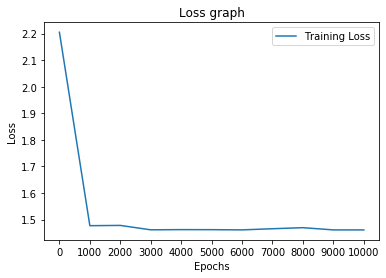

In [13]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(0, 10001, 1000)
plt.plot(iterations, loss, label = 'Training Loss')
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 10001, 1000))
plt.ylabel('Loss')
plt.legend()
plt.show()

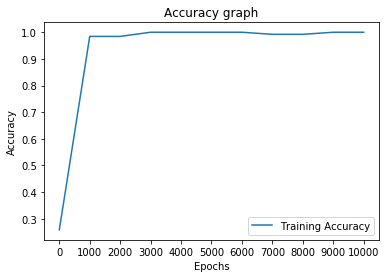

In [14]:
iterations = np.arange(0, 10001, 1000)
plt.plot(iterations, accuracy1, label = 'Training Accuracy')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 10001, 1000))
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Real Time Predictions

In [15]:
#Import required packages
import numpy as np
from PIL import Image

In [16]:
#Loading, converting and flattening an image for prediction
img = np.invert(Image.open('test_img.png').convert('L')).ravel()

Actual Ground Truth is 2
Prediction for test image is 2


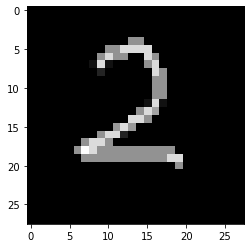

In [17]:
#Passing the loaded image to the neural network
prediction = sess.run(tf.argmax(Yhat, 1), feed_dict={X: [img]})
print('Actual Ground Truth is {}'.format(2))
print('Prediction for test image is {}'.format(np.squeeze(prediction)))
plt.imshow(np.reshape(img, [28, 28]), cmap='gray')

Actual Ground Truth is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Prediction for test image is 6


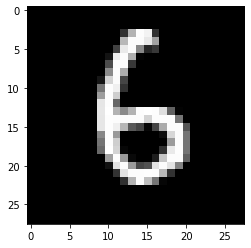

In [18]:
#Prediction using data from the Test Set randomly (We can select the index randomly)

prediction = sess.run(tf.argmax(Yhat, 1), feed_dict={X: [mnist.test.images[21]]})
print('Actual Ground Truth is {}'.format(np.squeeze(mnist.test.labels[21])))
print('Prediction for test image is {}'.format(np.squeeze(prediction)))
plt.imshow(np.reshape(mnist.test.images[21], [28, 28]), cmap='gray')